In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings. filterwarnings('ignore')

In [105]:
df = pd.read_csv("METABRIC_RNA_Mutation.csv",low_memory=False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1904, 693)

In [106]:
df["death_from_cancer"].unique

<bound method Series.unique of 0                     Living
1                     Living
2            Died of Disease
3                     Living
4            Died of Disease
                ...         
1899                  Living
1900         Died of Disease
1901         Died of Disease
1902    Died of Other Causes
1903    Died of Other Causes
Name: death_from_cancer, Length: 1904, dtype: object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [5]:
clinic_data = df.loc[:, df.columns[:31]]
clinic_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [6]:
clinic_data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [103]:
clinic_data["death_from_cancer"].unique()

array([2, 0, 1])

In [7]:
clinic_data.shape

(1904, 31)

In [8]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [9]:
clinic_data.isnull().sum().sum()

1100

In [10]:
clinic_data.isnull().sum()

patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0
pr_status                           0
radio_therap

In [11]:
counter = 0
for i in clinic_data.columns:
    counter += 1
print(counter)

31


In [12]:
def column_printer(dataset):
    counter = 0
    for i in dataset.columns:
        counter += 1
        print(i)
    print("--------------------------")
    print("Number of Columns : " , counter)
    

In [13]:
column_printer(clinic_data)

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage
death_from_cancer
--------------------------
Number of Columns :  31


In [14]:
def Null_Checker(dataset):
    total = dataset.isnull().sum().sort_values(ascending = False)
    percent = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total,percent],axis = 1,keys=['total_null', 'percent_null'])
    return missing_data

In [15]:
missing_data = Null_Checker(clinic_data) 

In [16]:
print(Null_Checker(clinic_data))
print(column_printer(clinic_data))

                                total_null  percent_null
tumor_stage                            501      0.263130
3-gene_classifier_subtype              204      0.107143
primary_tumor_laterality               106      0.055672
neoplasm_histologic_grade               72      0.037815
cellularity                             54      0.028361
mutation_count                          45      0.023634
er_status_measured_by_ihc               30      0.015756
type_of_breast_surgery                  22      0.011555
tumor_size                              20      0.010504
cancer_type_detailed                    15      0.007878
tumor_other_histologic_subtype          15      0.007878
oncotree_code                           15      0.007878
death_from_cancer                        1      0.000525
radio_therapy                            0      0.000000
lymph_nodes_examined_positive            0      0.000000
pr_status                                0      0.000000
overall_survival               

tumor_stage


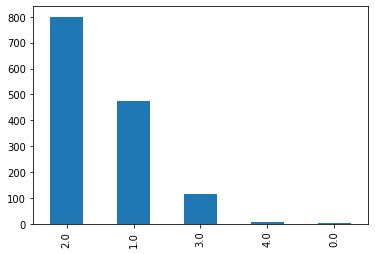

3-gene_classifier_subtype


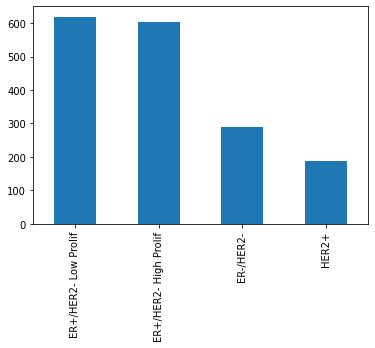

primary_tumor_laterality


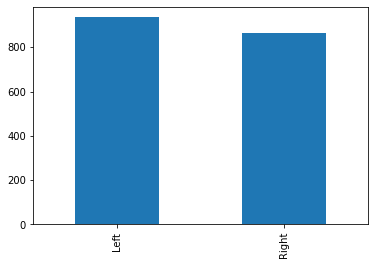

neoplasm_histologic_grade


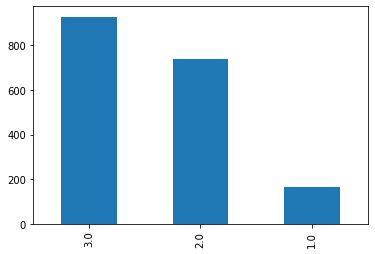

cellularity


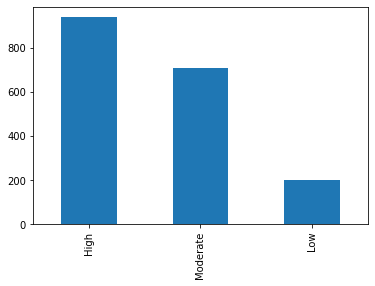

mutation_count


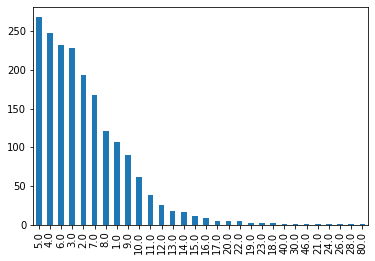

er_status_measured_by_ihc


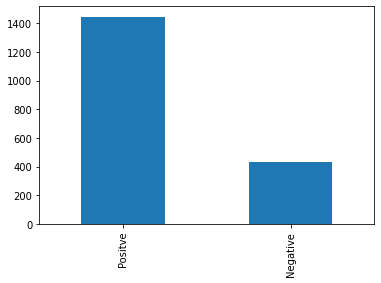

type_of_breast_surgery


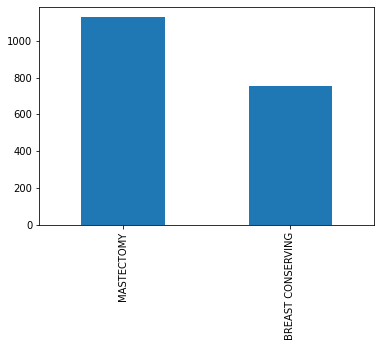

tumor_size


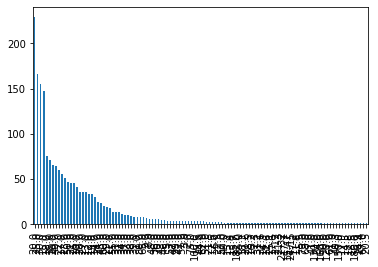

cancer_type_detailed


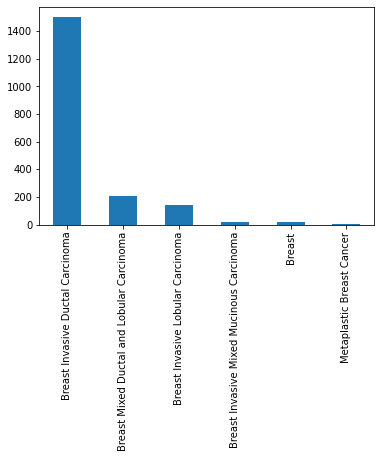

tumor_other_histologic_subtype


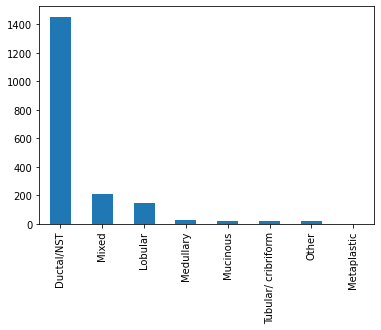

oncotree_code


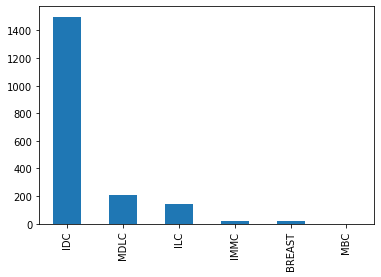

death_from_cancer


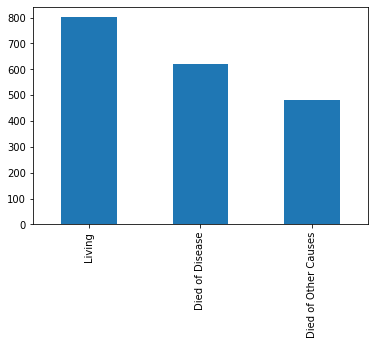

In [17]:
for missing_column in missing_data.index[:13]:
    df[missing_column].value_counts().plot.bar()
    print(missing_column)
    plt.show()

In [18]:
for column in missing_data.index[:13]:
    clinic_data[column].fillna(clinic_data[column].mode()[0], inplace=True)

In [19]:
missing_data.isnull().sum().sum()

0

In [20]:
clinic_data.isnull().sum().sum()

0

In [21]:
column_printer(clinic_data)

patient_id
age_at_diagnosis
type_of_breast_surgery
cancer_type
cancer_type_detailed
cellularity
chemotherapy
pam50_+_claudin-low_subtype
cohort
er_status_measured_by_ihc
er_status
neoplasm_histologic_grade
her2_status_measured_by_snp6
her2_status
tumor_other_histologic_subtype
hormone_therapy
inferred_menopausal_state
integrative_cluster
primary_tumor_laterality
lymph_nodes_examined_positive
mutation_count
nottingham_prognostic_index
oncotree_code
overall_survival_months
overall_survival
pr_status
radio_therapy
3-gene_classifier_subtype
tumor_size
tumor_stage
death_from_cancer
--------------------------
Number of Columns :  31


In [22]:
Null_Checker(clinic_data)

,total_null,percent_null
patient_id,0,0.0
inferred_menopausal_state,0,0.0
tumor_stage,0,0.0
tumor_size,0,0.0
3-gene_classifier_subtype,0,0.0
radio_therapy,0,0.0
pr_status,0,0.0
overall_survival,0,0.0
overall_survival_months,0,0.0
oncotree_code,0,0.0


In [23]:
clinic_data.isnull().sum().value_counts()

0    31
dtype: int64

In [24]:
clinic_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,ER+/HER2- Low Prolif,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,ER+/HER2- Low Prolif,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [25]:
def unique_checker(dataset):
    for i in dataset.columns:
        unique_values = np.unique(dataset[i])
        print(i)
        print(unique_values)

In [26]:
unique_checker(clinic_data)

patient_id
[   0    2    5 ... 7297 7298 7299]
age_at_diagnosis
[21.93 26.36 26.72 ... 90.43 92.14 96.29]
type_of_breast_surgery
['BREAST CONSERVING' 'MASTECTOMY']
cancer_type
['Breast Cancer' 'Breast Sarcoma']
cancer_type_detailed
['Breast' 'Breast Invasive Ductal Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma' 'Metaplastic Breast Cancer']
cellularity
['High' 'Low' 'Moderate']
chemotherapy
[0 1]
pam50_+_claudin-low_subtype
['Basal' 'Her2' 'LumA' 'LumB' 'NC' 'Normal' 'claudin-low']
cohort
[1. 2. 3. 4. 5.]
er_status_measured_by_ihc
['Negative' 'Positve']
er_status
['Negative' 'Positive']
neoplasm_histologic_grade
[1. 2. 3.]
her2_status_measured_by_snp6
['GAIN' 'LOSS' 'NEUTRAL' 'UNDEF']
her2_status
['Negative' 'Positive']
tumor_other_histologic_subtype
['Ductal/NST' 'Lobular' 'Medullary' 'Metaplastic' 'Mixed' 'Mucinous'
 'Other' 'Tubular/ cribriform']
hormone_therapy
[0 1]
inferred_menopausal_state
[

In [27]:
clinic_data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [28]:
ordinal_clinic_data = clinic_data[['cellularity','cancer_type_detailed','type_of_breast_surgery',
                       'her2_status_measured_by_snp6','pam50_+_claudin-low_subtype',
                       'tumor_other_histologic_subtype',
                       'integrative_cluster','3-gene_classifier_subtype','death_from_cancer']]
ordinal_clinic_data.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,claudin-low,Ductal/NST,4ER+,ER-/HER2-,Living
1,High,Breast Invasive Ductal Carcinoma,BREAST CONSERVING,NEUTRAL,LumA,Ductal/NST,4ER+,ER+/HER2- High Prolif,Living
2,High,Breast Invasive Ductal Carcinoma,MASTECTOMY,NEUTRAL,LumB,Ductal/NST,3,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,Mixed,9,ER+/HER2- Low Prolif,Living
4,High,Breast Mixed Ductal and Lobular Carcinoma,MASTECTOMY,NEUTRAL,LumB,Mixed,9,ER+/HER2- High Prolif,Died of Disease


In [29]:
from sklearn.preprocessing import LabelEncoder
ordinal_clinic_data = ordinal_clinic_data.apply(LabelEncoder().fit_transform)
ordinal_clinic_data.head()

,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,1,1,2,6,0,4,2,2
1,0,1,0,2,2,0,4,0,2
2,0,1,1,2,3,0,3,1,0
3,2,4,1,2,3,4,10,1,2
4,0,4,1,2,3,4,10,0,0


In [30]:
nominal_clinic_data = clinic_data[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nominal_clinic_data.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [31]:
nominal_clinic_data = pd.get_dummies(data = nominal_clinic_data, drop_first= True)
nominal_clinic_data.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,1,1,0,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0
2,1,1,0,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,1
4,1,1,0,0,1,1,0,0,0,0,1


In [32]:
clinic_data.drop(ordinal_clinic_data.columns, axis = 1, inplace = True)
clinic_data = clinic_data.join(ordinal_clinic_data)
clinic_data.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status,hormone_therapy,...,tumor_stage,cellularity,cancer_type_detailed,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,75.65,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,2.0,0,1,1,2,6,0,4,2,2
1,2,43.19,Breast Cancer,0,1.0,Positve,Positive,3.0,Negative,1,...,1.0,0,1,0,2,2,0,4,0,2
2,5,48.87,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,2.0,0,1,1,2,3,0,3,1,0
3,6,47.68,Breast Cancer,1,1.0,Positve,Positive,2.0,Negative,1,...,2.0,2,4,1,2,3,4,10,1,2
4,8,76.97,Breast Cancer,1,1.0,Positve,Positive,3.0,Negative,1,...,2.0,0,4,1,2,3,4,10,0,0


In [33]:
clinic_data.drop(['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code'], axis = 1, inplace = True)
clinic_data = clinic_data.join(nominal_clinic_data)
clinic_data.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1.0,3.0,1,10.0,5.0,6.044,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,0,1.0,3.0,1,0.0,2.0,4.020,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,1,1.0,2.0,1,1.0,2.0,4.030,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,1,1.0,2.0,1,3.0,1.0,4.050,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,1,1.0,3.0,1,8.0,2.0,6.080,...,1,0,0,1,1,0,0,0,0,1


In [34]:
def type_printer(dataset):
    return dataset.dtypes.unique()

In [35]:
print(type_printer(clinic_data))

[dtype('int64') dtype('float64') dtype('O') dtype('uint8')]


In [36]:
clinic_data.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,0,1.0,3.0,1,10.0,5.0,6.044,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,0,1.0,3.0,1,0.0,2.0,4.020,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,1,1.0,2.0,1,1.0,2.0,4.030,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,1,1.0,2.0,1,3.0,1.0,4.050,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,1,1.0,3.0,1,8.0,2.0,6.080,...,1,0,0,1,1,0,0,0,0,1


In [37]:
clinic_data[['age_at_diagnosis','nottingham_prognostic_index']] = clinic_data[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil)

In [38]:
clinic_data.head()

,patient_id,age_at_diagnosis,cancer_type,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,0,1.0,3.0,1,10.0,5.0,7.0,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,0,1.0,3.0,1,0.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,1,1.0,2.0,1,1.0,2.0,5.0,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,1,1.0,2.0,1,3.0,1.0,5.0,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,1,1.0,3.0,1,8.0,2.0,7.0,...,1,0,0,1,1,0,0,0,0,1


In [39]:
clinic_data.drop(['patient_id','cancer_type'], axis=1, inplace=True)

In [40]:
clinic_data.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,1,0,0,1,1,0,0,0,0,1


In [41]:
clinic_data.shape

(1904, 33)

In [42]:
clinic_data.to_csv("Clinical Data")

In [43]:
new_clinic_data = clinic_data[clinic_data.columns[:33]]
new_clinic_data.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,1,0,0,1,1,0,0,0,0,1


In [44]:
new_clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age_at_diagnosis                   1904 non-null   float64
 1   chemotherapy                       1904 non-null   int64  
 2   cohort                             1904 non-null   float64
 3   neoplasm_histologic_grade          1904 non-null   float64
 4   hormone_therapy                    1904 non-null   int64  
 5   lymph_nodes_examined_positive      1904 non-null   float64
 6   mutation_count                     1904 non-null   float64
 7   nottingham_prognostic_index        1904 non-null   float64
 8   overall_survival_months            1904 non-null   float64
 9   overall_survival                   1904 non-null   int64  
 10  radio_therapy                      1904 non-null   int64  
 11  tumor_size                         1904 non-null   float

<AxesSubplot:xlabel='death_from_cancer', ylabel='tumor_size'>

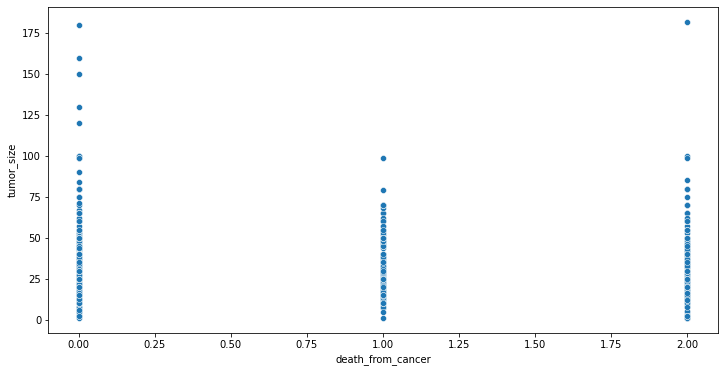

In [98]:
sns.scatterplot(x="death_from_cancer",y="tumor_size",data=new_clinic_data)

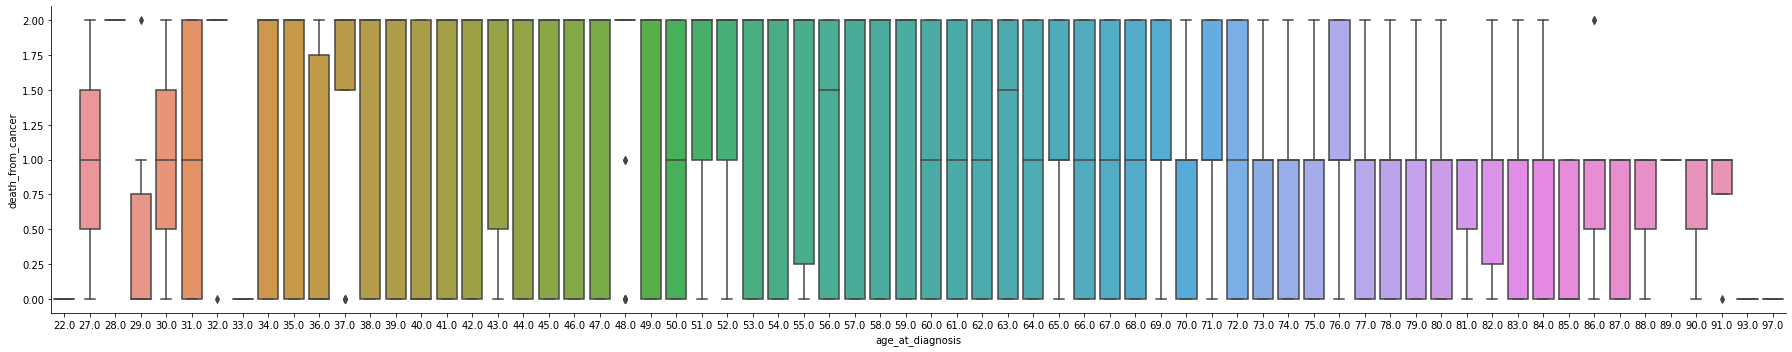

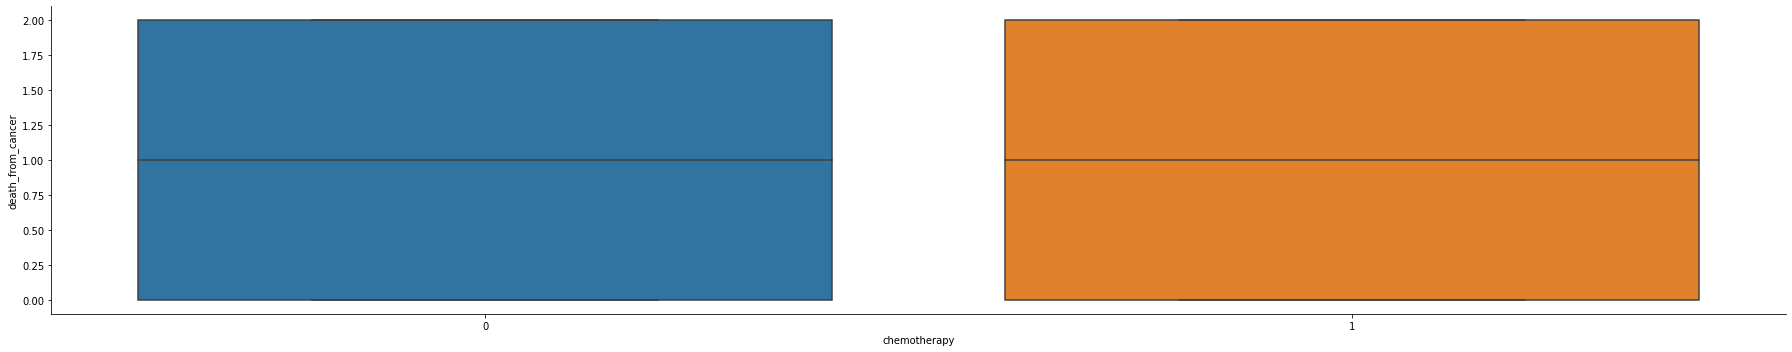

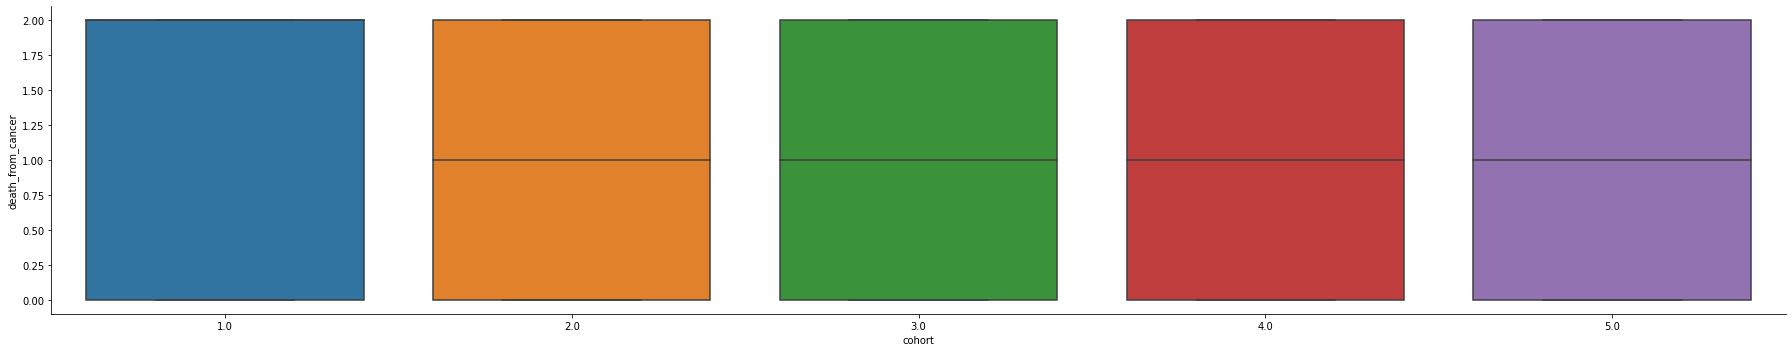

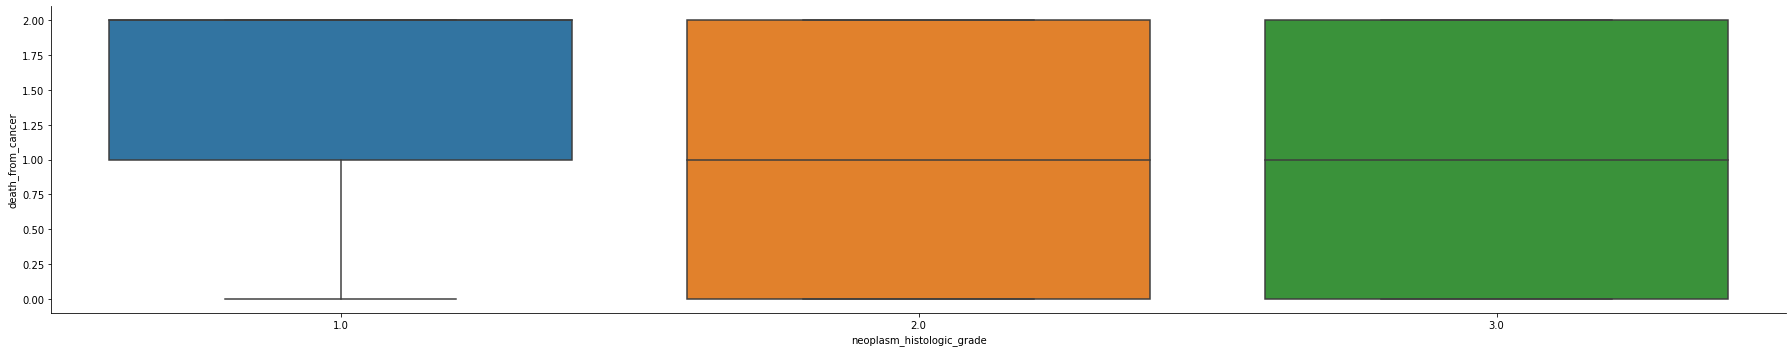

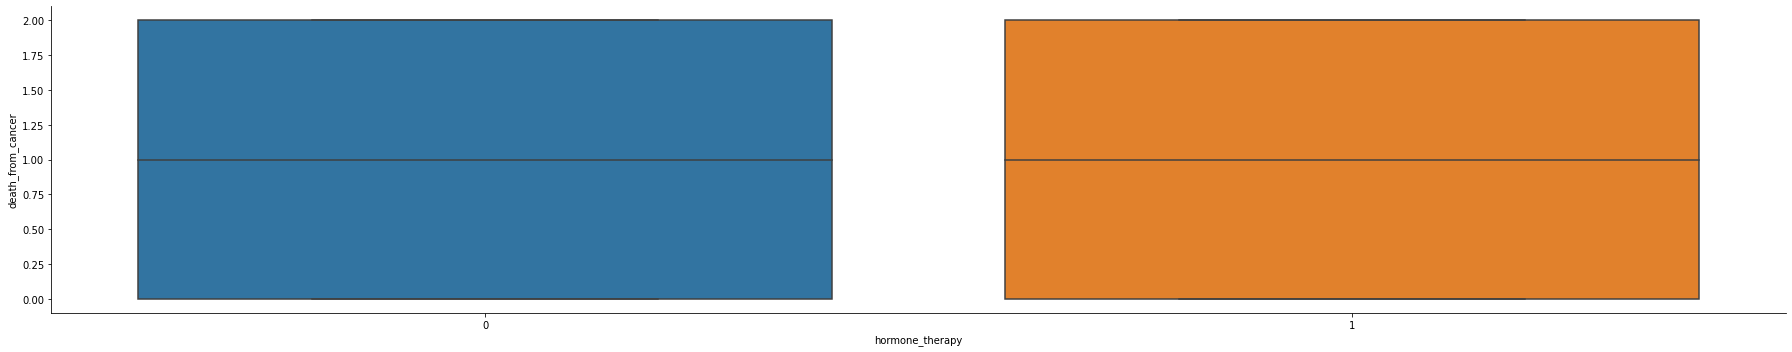

In [45]:
for i in clinic_data[clinic_data.columns[:5]]:
    sns.catplot(x=i, y='death_from_cancer', data=clinic_data, height=5, aspect=5, kind='box')
    plt.show()

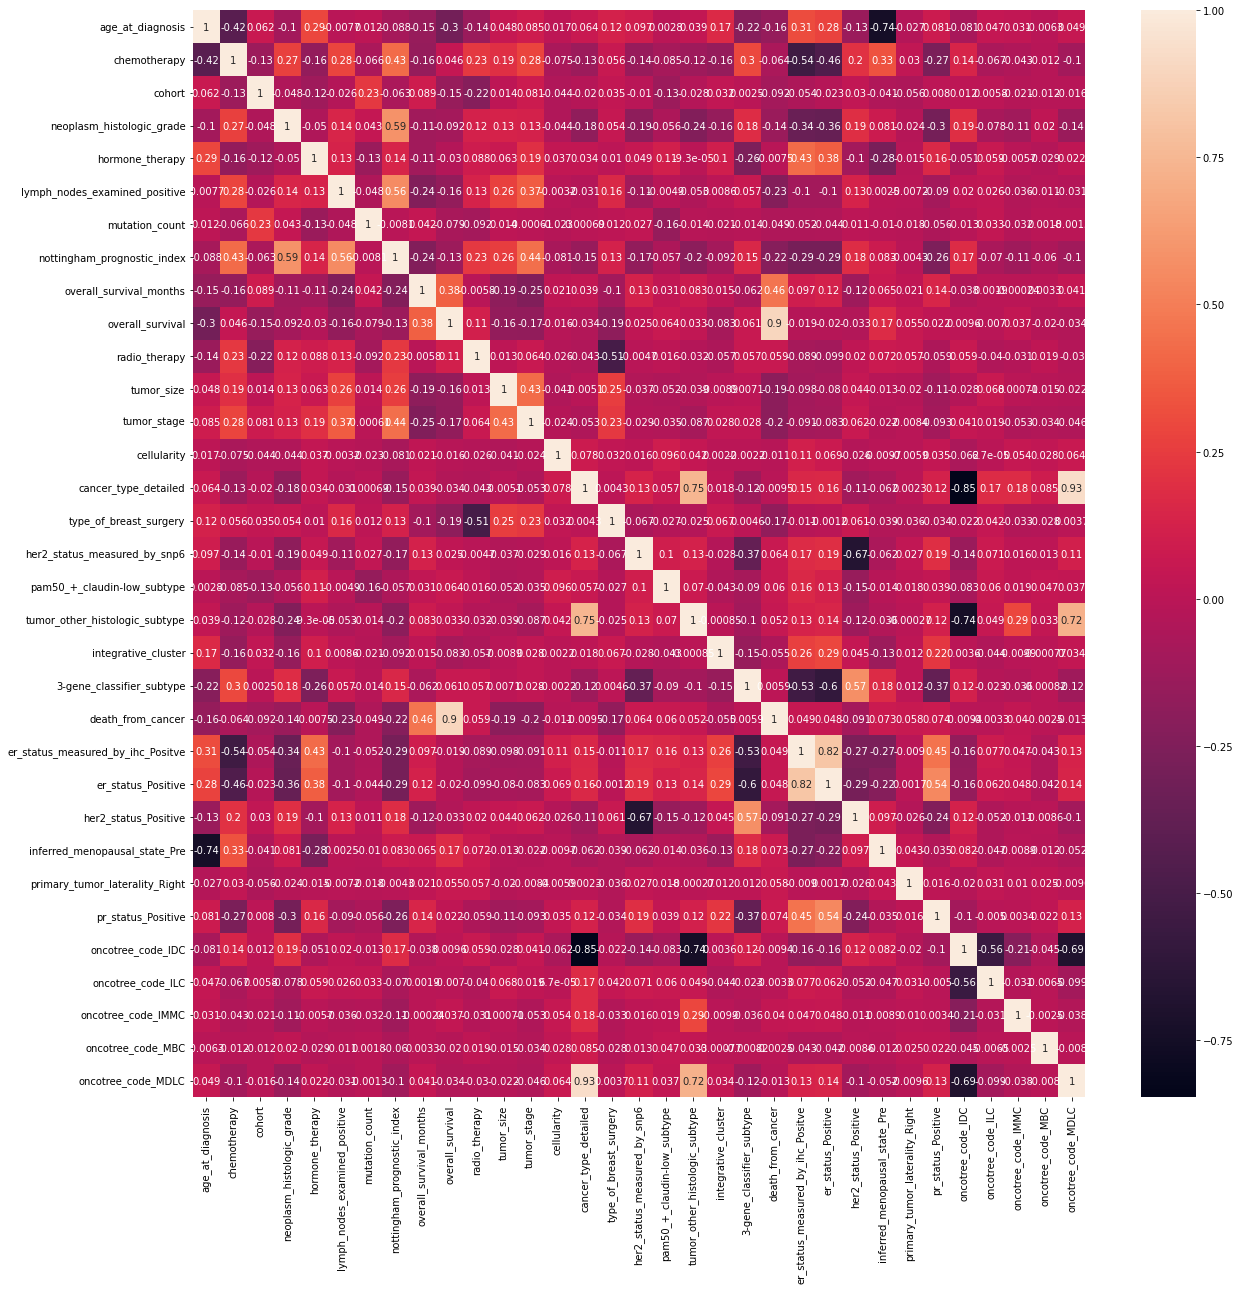

In [46]:
corr_matrix = new_clinic_data.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [47]:
treatments = ['chemotherapy', 'hormone_therapy', 'radio_therapy']

In [48]:
died = new_clinic_data[new_clinic_data['overall_survival']==0]
survived = new_clinic_data[new_clinic_data['overall_survival']==1]

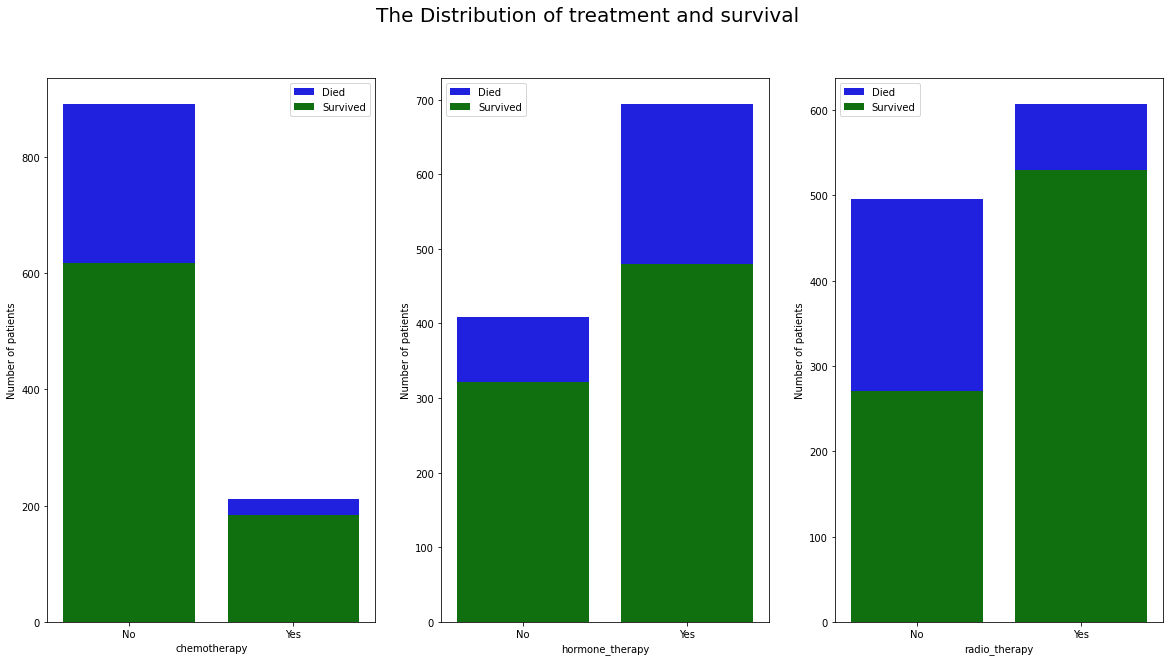

In [49]:
fig, ax = plt.subplots(ncols=3, figsize=(20,10))
fig.suptitle('The Distribution of treatment and survival', fontsize = 20)

k = 0
for i in treatments:
    sns.countplot(died[i], color='blue', label='Died', ax=ax[k])
    sns.countplot(x= survived[i] , color='green', label='Survived', ax=ax[k])
    ax[k].legend()
    ax[k].set(xticklabels=['No','Yes'])
    ax[k].set_xlabel(i)
    ax[k].set_ylabel('Number of patients')
    k += 1

plt.show()

In [50]:
new_clinic_data[treatments]

,chemotherapy,hormone_therapy,radio_therapy
0,0,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,1
...,...,...,...
1899,0,1,1
1900,0,0,1
1901,0,1,1
1902,0,1,0


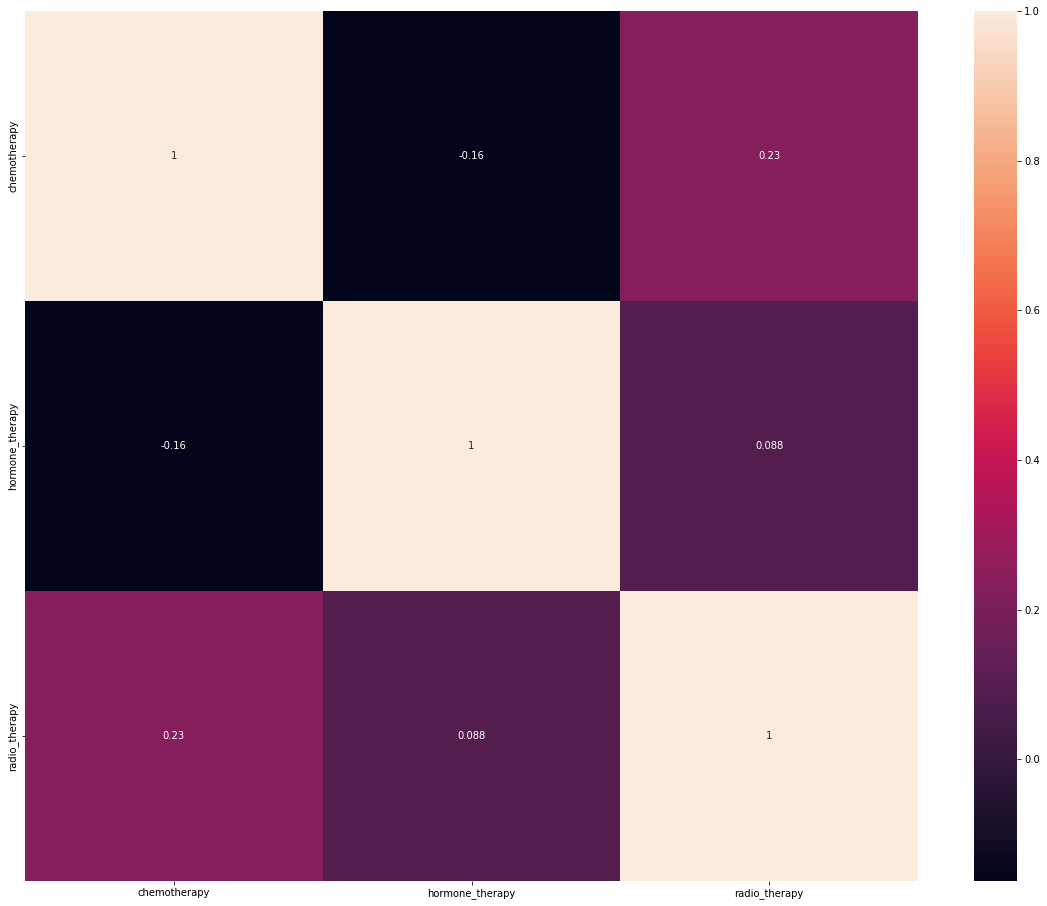

In [51]:
corr_matrix = new_clinic_data[treatments].corr()
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

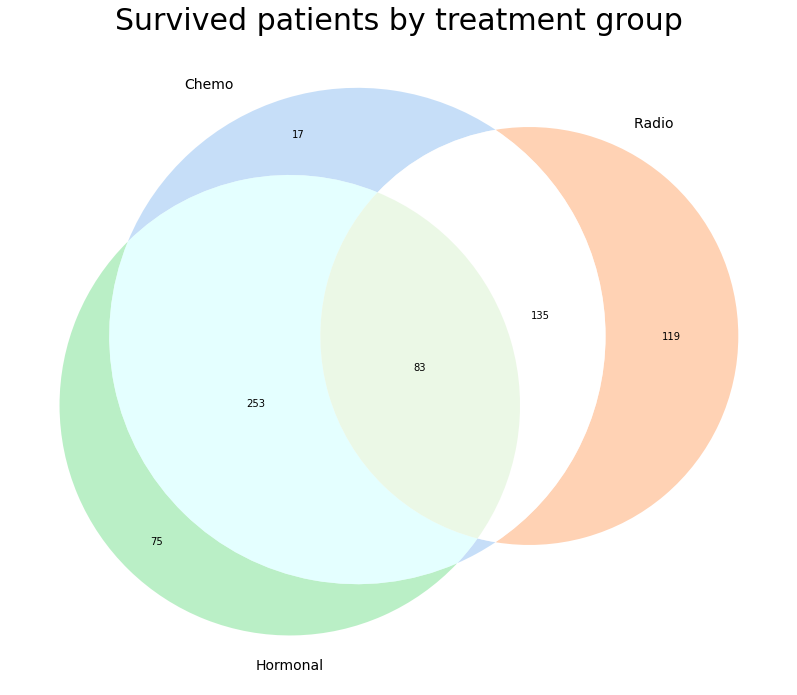

In [52]:
from matplotlib_venn import venn3

chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==False)]
radio = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
chemo_radio = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
radio_hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]
hormonal_chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
all_3 = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]

df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

fig, ax = plt.subplots(figsize=(20,12))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette("pastel"))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Survived patients by treatment group", size=30)
plt.show()

In [53]:
new_clinic_data[new_clinic_data.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,1904.0,61.586660,12.987235,22.0,52.000,62.000000,71.000000,97.0
chemotherapy,1904.0,0.207983,0.405971,0.0,0.000,0.000000,0.000000,1.0
cohort,1904.0,2.643908,1.228615,1.0,1.000,3.000000,3.000000,5.0
neoplasm_histologic_grade,1904.0,2.438025,0.647842,1.0,2.000,3.000000,3.000000,3.0
hormone_therapy,1904.0,0.616597,0.486343,0.0,0.000,1.000000,1.000000,1.0
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.0,0.000,0.000000,2.000000,45.0
mutation_count,1904.0,5.681197,4.011903,1.0,3.000,5.000000,7.000000,80.0
nottingham_prognostic_index,1904.0,4.970588,1.143501,1.0,4.000,5.000000,6.000000,7.0
overall_survival_months,1904.0,125.121324,76.334148,0.0,60.825,115.616667,184.716667,355.2
overall_survival,1904.0,0.420693,0.493800,0.0,0.000,0.000000,1.000000,1.0


In [54]:
from sklearn.preprocessing import MinMaxScaler

x = new_clinic_data.loc[:, new_clinic_data.columns != 'death_from_cancer'].values
x = MinMaxScaler().fit_transform(x) 
x

array([[0.72      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.29333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.36      , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.54666667, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.53333333, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.52      , 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ]])

In [55]:
normalised_df = pd.DataFrame(x)
normalised_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.720000,0.0,0.0,1.0,1.0,0.222222,0.050633,1.000000,0.395552,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.293333,0.0,0.0,1.0,1.0,0.000000,0.012658,0.666667,0.238270,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.360000,1.0,0.0,0.5,1.0,0.022222,0.012658,0.666667,0.460867,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.346667,1.0,0.0,0.5,1.0,0.066667,0.000000,0.666667,0.464339,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.733333,1.0,0.0,1.0,1.0,0.177778,0.012658,1.000000,0.116460,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
normalised_df.shape

(1904, 32)

In [107]:
from sklearn.decomposition import PCA

data_rescaled = normalised_df

pca = PCA().fit(data_rescaled)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
principal_components = pca.fit_transform(data_rescaled)
principal_df = pd.DataFrame(data = principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.041443,0.340759,-0.400435,-0.077436,0.654274,0.250475,0.899575,-0.298716,-0.270337,-0.033142,...,-0.182539,-0.073490,0.143210,-0.027988,0.010187,0.085312,0.005394,0.028147,0.004062,1.294121e-17
1,-0.264290,1.210267,-0.066095,-0.625886,0.353341,-0.186373,0.265985,0.391653,-0.126833,0.495614,...,0.164495,-0.080125,0.034964,-0.011584,-0.007459,0.015848,0.003946,-0.032533,-0.001414,4.739169e-16
2,-0.137398,-0.331868,-0.021765,-0.624559,0.692334,-0.224626,0.223567,1.068731,-0.293564,0.511288,...,-0.001588,0.045193,0.081644,-0.022719,-0.077103,0.000196,0.021060,-0.022092,0.004432,2.236207e-16
3,-0.497446,0.583962,1.197812,0.347366,0.582958,0.755525,0.318942,1.312087,0.128460,-0.085723,...,0.103365,0.053671,0.094263,-0.055235,-0.014505,0.006749,-0.003010,-0.021815,0.000384,4.094426e-16
4,-0.639174,0.048329,0.345773,1.037035,0.839819,-0.471745,0.427820,1.144099,-0.006356,-0.544174,...,0.046490,-0.046313,0.160151,-0.091121,0.044760,-0.012505,-0.018309,-0.019371,-0.000264,-7.299139e-16


In [59]:
new_clinic_data

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,1.0,3.0,1,10.0,5.0,7.0,140.500000,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,1.0,3.0,1,0.0,2.0,5.0,84.633333,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,1.0,2.0,1,1.0,2.0,5.0,163.700000,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,1.0,2.0,1,3.0,1.0,5.0,164.933333,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,1.0,3.0,1,8.0,2.0,7.0,41.366667,0,...,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,44.0,0,4.0,3.0,1,1.0,4.0,6.0,196.866667,1,...,1,0,1,1,1,0,1,0,0,0
1900,43.0,0,4.0,3.0,0,1.0,6.0,6.0,44.733333,0,...,1,1,1,0,0,1,0,0,0,0
1901,63.0,0,4.0,3.0,1,45.0,4.0,7.0,175.966667,0,...,1,0,0,0,1,1,0,0,0,0
1902,62.0,0,4.0,2.0,1,12.0,15.0,6.0,86.233333,0,...,1,0,0,0,1,1,0,0,0,0


In [60]:
new_clinic_data.columns

Index(['age_at_diagnosis', 'chemotherapy', 'cohort',
       'neoplasm_histologic_grade', 'hormone_therapy',
       'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'overall_survival_months',
       'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage',
       'cellularity', 'cancer_type_detailed', 'type_of_breast_surgery',
       'her2_status_measured_by_snp6', 'pam50_+_claudin-low_subtype',
       'tumor_other_histologic_subtype', 'integrative_cluster',
       '3-gene_classifier_subtype', 'death_from_cancer',
       'er_status_measured_by_ihc_Positve', 'er_status_Positive',
       'her2_status_Positive', 'inferred_menopausal_state_Pre',
       'primary_tumor_laterality_Right', 'pr_status_Positive',
       'oncotree_code_IDC', 'oncotree_code_ILC', 'oncotree_code_IMMC',
       'oncotree_code_MBC', 'oncotree_code_MDLC'],
      dtype='object')

In [61]:
from sklearn.model_selection import train_test_split
X = principal_df
y = new_clinic_data['death_from_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [62]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
346,-0.068375,0.354022,0.034429,-0.456495,-0.595768,0.549976,0.419710,-0.257197,-0.152330,1.208683,...,0.011446,-0.029886,0.034182,-0.007608,0.013371,0.024615,0.019895,0.017505,0.002044,-6.462450e-17
1813,-0.362551,0.324727,-0.101003,-0.713222,-0.490199,-0.092068,0.493671,0.671501,0.103598,0.252119,...,0.138746,0.129126,-0.083791,0.079819,0.266879,-0.110167,-0.004401,-0.014776,0.003608,-5.178467e-18
364,0.315389,0.321055,-0.344600,-0.244777,-0.311803,0.093892,0.808898,0.777828,-0.142377,-0.807602,...,0.322520,-0.082053,0.094098,-0.005101,-0.011515,-0.003443,0.003844,0.049073,-0.005956,-3.270427e-17
429,0.157425,1.017153,0.245087,0.654786,0.561272,0.050020,0.893513,-0.049449,-0.183928,0.082644,...,-0.085325,-0.035390,-0.169004,-0.378647,-0.062398,-0.035265,0.440760,0.006033,-0.000611,1.156287e-17
189,-0.303145,-0.439917,1.079609,-0.063746,-0.582853,0.249180,0.448296,-0.626349,-0.209074,0.031402,...,-0.135169,-0.200825,-0.295721,-0.281212,0.031147,-0.004664,0.461569,-0.067387,-0.000172,-6.325237e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,-0.439307,-0.762490,0.178620,0.638327,0.776448,-0.279326,0.636938,-0.318918,-0.268225,0.596509,...,0.083110,0.070186,-0.056576,-0.016340,0.055100,-0.063627,-0.029163,0.023942,-0.000013,-7.947734e-19
229,0.434239,0.521541,-0.062249,-0.390946,0.644821,0.251002,0.883460,0.672614,-0.420601,0.477840,...,-0.181258,0.174476,0.035081,0.002026,0.035092,0.002368,0.017687,0.013779,0.010524,-2.282221e-17
487,-0.588402,-0.275345,-0.175499,-0.650671,-0.440161,0.040523,0.811116,0.034172,-0.322501,-0.174240,...,0.130722,-0.130070,0.010773,0.017596,0.020777,-0.015136,-0.000934,0.007748,0.000416,-3.560589e-17
81,0.612833,-0.348078,-0.938801,0.678927,-0.046265,0.885053,0.032023,0.592238,0.748241,0.013736,...,-0.202175,-0.036067,-0.139621,0.069635,0.147001,0.237458,-0.001840,-0.009699,0.001488,-4.278297e-17


In [63]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
1810,0.257435,-0.682910,-0.030871,-0.305469,-0.279113,0.445945,-0.344924,1.173601,-0.347172,0.224732,...,-0.070810,-0.181587,0.067652,-0.002854,0.086217,0.155240,0.020288,-0.023736,-0.000345,-1.558061e-17
49,-0.416302,1.050366,0.933468,0.586338,-0.515287,0.196826,0.402815,1.192964,0.192684,0.159441,...,-0.095890,0.267009,-0.055974,0.007083,0.039137,-0.035022,-0.004266,-0.033187,0.003182,-5.378104e-17
475,-0.091576,-0.252989,-0.924003,0.198359,-0.190317,-0.156302,0.231196,0.488815,1.097487,-0.165063,...,0.025195,0.052752,0.105739,-0.047653,-0.081211,-0.038370,0.003310,-0.033722,0.003642,-3.642466e-17
43,-0.465422,0.922187,0.839759,1.109347,0.435162,0.644665,0.272196,-0.447557,-0.091283,0.124812,...,-0.012455,-0.013551,-0.081490,0.017637,-0.035049,-0.021715,0.000571,-0.036953,0.002745,3.189482e-17
1481,-0.291529,0.499794,-0.815458,0.106234,0.563352,-0.538307,-0.186701,0.088247,0.911832,0.176458,...,-0.024288,-0.021084,-0.026156,-0.014535,-0.042166,0.000682,-0.002875,-0.000178,-0.003858,-5.866133e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1.752343,-0.339690,-0.557368,0.399992,-0.162286,-0.027057,0.405447,0.906851,0.687145,0.351156,...,0.030211,-0.044293,0.145938,-0.052997,-0.063257,-0.032457,0.014434,-0.005288,0.004094,-9.260882e-18
1,-0.264290,1.210267,-0.066095,-0.625886,0.353341,-0.186373,0.265985,0.391653,-0.126833,0.495614,...,0.164495,-0.080125,0.034964,-0.011584,-0.007459,0.015848,0.003946,-0.032533,-0.001414,4.739169e-16
907,-0.181691,0.483754,-0.704623,0.384795,0.572085,-0.072562,-0.302012,-0.489245,-0.107897,0.405480,...,0.171144,-0.079431,0.052502,-0.028803,0.030281,-0.017799,-0.001383,-0.000079,-0.002184,-1.601928e-17
631,0.748332,-0.980045,-0.332387,0.383346,-0.247574,0.589837,-0.088641,-0.353962,-0.405323,-0.182727,...,0.143183,-0.113427,0.025084,0.000218,0.085503,-0.044151,0.001250,-0.018594,-0.003249,3.129671e-18


In [64]:
y_train

346     2
1813    2
364     2
429     2
189     2
       ..
1403    0
229     2
487     2
81      0
845     0
Name: death_from_cancer, Length: 1523, dtype: int64

In [65]:
y_test

1810    0
49      2
475     1
43      2
1481    0
       ..
1427    0
1       2
907     1
631     1
258     2
Name: death_from_cancer, Length: 381, dtype: int64

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [89]:
from sklearn.model_selection import StratifiedKFold, cross_val_score


def model_apply(model_name,model,X_train,y_train,X_test,y_test):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    BOLD = '\033[1m'
    END = '\033[0m'

    print(BOLD + model_name + END)
    print()
    print("Corss Val Score :",results)
    print()
    print("CV Standart Deviation:",results.std())
    print()
    print("CV Mean score:",results.mean())
    print()
    model.fit(X_train,y_train)
    print('Train score:   ', model.score(X_train, y_train))
    print()
    print('Test score:    ', model.score(X_test, y_test))
    yPred = model.predict(X_test)
    accuracy = accuracy_score(y_test,yPred)
    print()
    print(('Accuracy Score: %.2f' % (accuracy*100)),"%")
    return results.std(),results.mean()


In [90]:
results = []
names = []
from sklearn.linear_model import LogisticRegression

name_lr = "LogisticRegression"
LogReg = LogisticRegression()

result_mean, result_std = model_apply(name_lr,LogReg,X_train,y_train,X_test,y_test)
names.append(name_lr)
results.append([result_mean,result_std])




LogisticRegression

Corss Val Score : [0.85901639 0.82622951 0.81311475 0.83881579 0.875     ]

CV Standart Deviation: 0.02222977868641007

CV Mean score: 0.8424352890422778

Train score:    0.8614576493762311

Test score:     0.8267716535433071

Accuracy Score: 82.68 %


In [91]:
from sklearn.ensemble import AdaBoostClassifier
name_abc = "AdaBoostClassifier"
AdaBoostClassifier_model = AdaBoostClassifier()
result_mean, result_std = model_apply(name_abc,AdaBoostClassifier_model,X_train,y_train,X_test,y_test)
names.append(name_abc)
results.append([result_mean,result_std])


AdaBoostClassifier

Corss Val Score : [0.78032787 0.78688525 0.7704918  0.73026316 0.75986842]

CV Standart Deviation: 0.01987681872886398

CV Mean score: 0.7655672993960311

Train score:    0.7905449770190414

Test score:     0.7480314960629921

Accuracy Score: 74.80 %


In [92]:
from sklearn.neighbors import KNeighborsClassifier

name_KNC = "KNeighborsClassifier"
KNeighborsClassifier_model = KNeighborsClassifier()
result_mean, result_std = model_apply(name_KNC,KNeighborsClassifier_model,X_train,y_train,X_test,y_test)
names.append(name_KNC)
results.append([result_mean,result_std])

KNeighborsClassifier

Corss Val Score : [0.79344262 0.72131148 0.75737705 0.77302632 0.75328947]

CV Standart Deviation: 0.023817323532888998

CV Mean score: 0.7596893874029336

Train score:    0.8568614576493763

Test score:     0.7427821522309711

Accuracy Score: 74.28 %


In [93]:
from sklearn.ensemble import GradientBoostingClassifier

name_GBC = "GradientBoostingClassifier"
GradientBoostingClassifier_model = GradientBoostingClassifier()
result_mean, result_std = model_apply(name_GBC,GradientBoostingClassifier_model,X_train,y_train,X_test,y_test)
names.append(name_GBC)
results.append([result_mean,result_std])

GradientBoostingClassifier

Corss Val Score : [0.83934426 0.81967213 0.79016393 0.81578947 0.8125    ]

CV Standart Deviation: 0.01572867034489541

CV Mean score: 0.8154939603106126

Train score:    0.9776756401838477

Test score:     0.8110236220472441

Accuracy Score: 81.10 %


In [94]:
from sklearn.tree import DecisionTreeClassifier
name_DTC = "DecisionTreeClassifier"
DecisionTreeClassifier_model = DecisionTreeClassifier()
result_mean, result_std = model_apply(name_DTC,DecisionTreeClassifier_model,X_train,y_train,X_test,y_test)
names.append(name_DTC)
results.append([result_mean,result_std])


DecisionTreeClassifier

Corss Val Score : [0.73114754 0.74754098 0.7147541  0.72368421 0.73355263]

CV Standart Deviation: 0.010898243218521772

CV Mean score: 0.7301358930112166

Train score:    1.0

Test score:     0.7296587926509186

Accuracy Score: 72.97 %


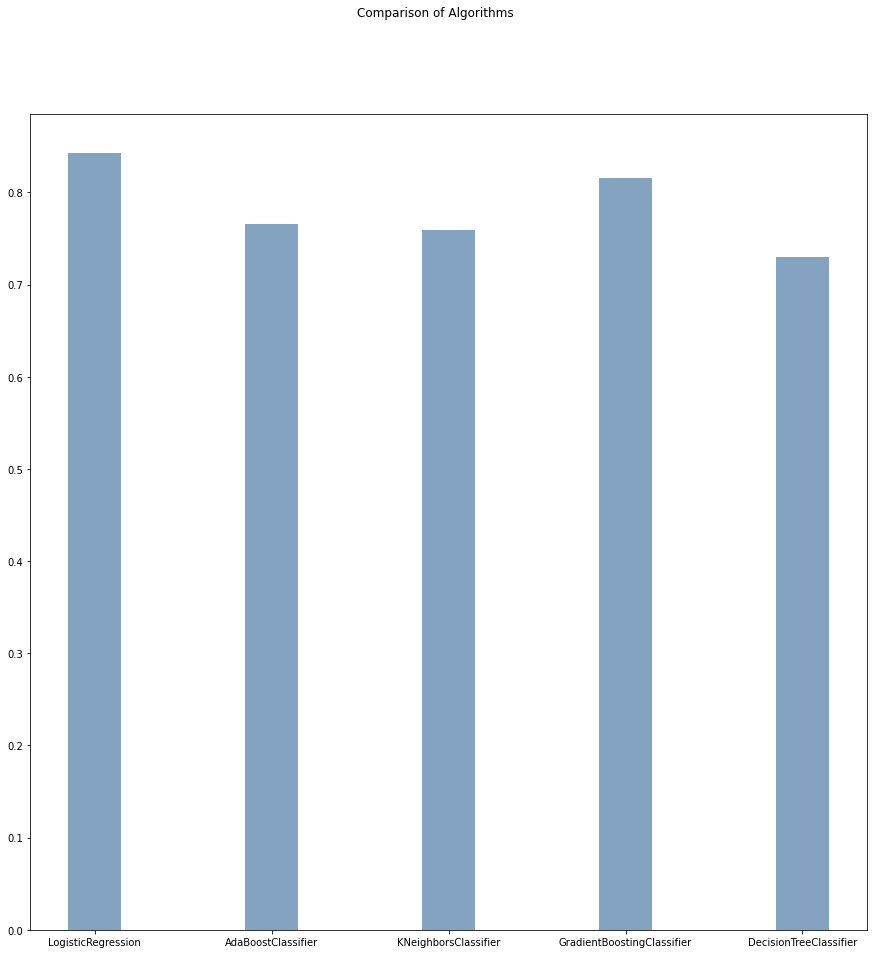

In [96]:
fig = plt.figure(figsize=(15,15))
fig.suptitle('Comparison of Algorithms')
new_results = []
for i in range(len(results)):
    new_results.append(results[i][1])
plt.bar(names, new_results, color =(0.2, 0.4, 0.6, 0.6),
        width = 0.3)
plt.show()